In [1]:
%pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_10_9_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_10_9_x86_64.whl (11.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 21.5 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install ipywidgets

  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp310-cp310-macosx_10_10_x86_64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 7.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.2 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_10_9_x86_64.whl (68 kB)
Using cached pillow-10.3.0-cp310-cp310-macosx_10_10_x86_64.whl (3.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
%pip install plotly

  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 34.3 MB/s eta 0:00:0000:0100:01
Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
# For Plotly
%pip install nbformat

  Using cached fastjsonschema-2.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached fastjsonschema-2.19.1-py3-none-any.whl (23 kB)
Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.7/335.7 kB 6.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


# Initialize

In [1]:
import csv
import json
import os

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
records = sorted(os.listdir('../data/'))
records = [os.path.join('../data/', record) for record in records if record.endswith('.csv')]
records

['../data/member-voting-record-2006-2010.csv',
 '../data/member-voting-record-2010-2014.csv',
 '../data/member-voting-record-2014-2018.csv',
 '../data/member-voting-record-2018-2022.csv',
 '../data/member-voting-record-2022-2026.csv']

# Table conversion

Currently, each row in the voting record files corresponds to a single councillor and their vote on an item.  
We want to make it so that each row is instead a councillor, and the columns correspond to a how they voted for an item.

In [3]:
# Read each file
rows = {}  # Councillor[str] -> Votes[list]
indices = {}  # Voting item[str] -> Index[int]
next_index = 0

# First pass: Obtain set of Agenda Items
for filename in tqdm(records, desc='Loading Agenda Items', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):
            assert row['Agenda Item #'], row
            if row['Agenda Item #'] not in indices:
                indices[row['Agenda Item #']] = next_index
                next_index += 1
print("Found", len(indices), "unique Agenda Items.")

# Second pass: Obtain councillor votes
for filename in tqdm(records, desc='Loading Councillor Votes', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):

            assert row['First Name'], row
            assert row['Last Name'], row
            assert row['Vote'], row

            name = f"{row['First Name'].strip()} {row['Last Name'].strip()}"
            index = indices[row['Agenda Item #']]

            # Initialize councillor
            if name not in rows:
                # Use -1 like 'Absent'
                rows[name] = [-1 for __ in range(len(indices))]

            # Store vote
            if row['Vote'] == 'Yes':
                rows[name][index] = 1
            elif row['Vote'] == 'No':
                rows[name][index] = 0
            elif row['Vote'] == 'Absent':
                rows[name][index] = -1
            else:
                raise ValueError(f"Invalid vote type: {row['Vote']}")
print("Done.")

Loading Agenda Items:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Found 8613 unique Agenda Items.


Loading Councillor Votes:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Done.


In [4]:
# Correct encoding issue with Ana Bailão
rows['Ana Bailão'] = rows['Ana BailÃ£o']
del rows['Ana BailÃ£o']

In [5]:
# print(rows['Paul Ainslie'])
print(len(rows))
for name in rows:
    print(name)

92
Paul Ainslie
Brian Ashton
Maria Augimeri
Sandra Bussin
Shelley Carroll
Raymond Cho
Janet Davis
Glenn De Baeremaeker
Mike Del Grande
Frank Di Giorgio
Mike Feldman
John Filion
Paula Fletcher
Rob Ford
Adam Giambrone
Mark Grimes
Suzan Hall
A.A. Heaps
Doug Holyday
Cliff Jenkins
Norman Kelly
Chin Lee
Gloria Lindsay Luby
Giorgio Mammoliti
Pam McConnell
Joe Mihevc
Peter Milczyn
David Miller
Denzil Minnan-Wong
Ron Moeser
Howard Moscoe
Frances Nunziata
Case Ootes
Cesar Palacio
Joe Pantalone
John Parker
Gord Perks
Anthony Perruzza
Kyle Rae
Bill Saundercook
David Shiner
Karen Stintz
Michael Thompson
Adam Vaughan
Michael Walker
Michelle Berardinetti
Josh Colle
Gary Crawford
Vincent Crisanti
Sarah Doucette
Doug Ford
Mary Fragedakis
Mike Layton
Josh Matlow
Mary-Margaret McMahon
James Pasternak
Jaye Robinson
Kristyn Wong-Tam
Peter Leon
James Maloney
Ceta Ramkhalawansingh
Jon Burnside
John Campbell
Christin Carmichael Greb
Joe Cressy
Justin J. Di Ciano
Stephen Holyday
Jim Karygiannis
John Tory
Miche

In [6]:
# Convert to DataFrame
councillor_df = pd.DataFrame(
    [rows[name] for name in rows],
    columns=[agenda_item for agenda_item in indices],
    index=[name for name in rows]
)

councillor_df

,2009.IA30.5,2009.RM30.5,2009.EX28.8,2009.EX28.2,2009.CD21.4,2009.ED18.2,2009.GM20.5,2009.PE21.5,2009.PG22.2,2009.BL30.1,...,2023.MM12.6,2023.MM12.12,2023.MM12.14,2023.MM12.17,2023.CC12.14,2023.NY9.3,2023.NY9.30,2023.NY9.18,2023.TE9.12,2023.TA4.8
Paul Ainslie,0,1,1,1,-1,1,0,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
Brian Ashton,1,-1,1,1,1,1,1,0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Maria Augimeri,0,-1,1,1,1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Sandra Bussin,0,1,1,1,1,1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Shelley Carroll,0,-1,1,1,1,-1,-1,1,1,1,...,0,1,1,1,1,0,1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Amber Morley,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
Jamaal Myers,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
Dianne Saxe,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,1,1,1,-1,-1,-1,1,1
Olivia Chow,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,1,1,1,-1,-1,-1,-1,-1


# Perform Clustering

## Dimensionality Reduction

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(councillor_df)

PCA(n_components=3)

In [8]:
reduced_councillor_df = pca.transform(councillor_df)

In [24]:
reduced_councillor_df[:10]

array([[ 76.2623336 ,  21.29030306,  27.93539183],
       [-58.27450162, -13.9668943 ,   0.99870313],
       [ 58.50447324, -16.51045576, -26.7478353 ],
       [-57.69179911, -15.94233863,   1.42665951],
       [ 64.05193269,   2.76702134,  37.85161805],
       [ 31.86191888, -46.35507834,   1.26154055],
       [ 68.73882341, -17.40558736, -29.36597277],
       [ 73.38079943, -15.60268417, -31.9869391 ],
       [ 10.9765053 , -59.60872345,  17.55457609],
       [ 61.14981586, -19.65311987, -27.76998325]])

In [10]:
len(reduced_councillor_df)

92

In [11]:
councillor_df.iloc[1].name

'Brian Ashton'

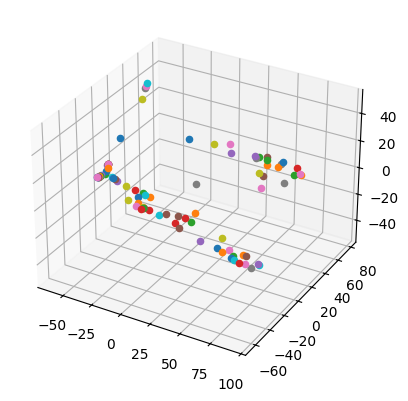

In [25]:
# Graphing
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(reduced_councillor_df)):
    point = reduced_councillor_df[i,0], reduced_councillor_df[i,1], reduced_councillor_df[i,2]
    ax.scatter(*point)
    # ax.text(*point, councillor_df.iloc[i].name)

plt.show()

## Clustering

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(reduced_councillor_df)
kmeans.labels_


array([1, 0, 4, 0, 1, 2, 4, 4, 2, 4, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 4, 4,
       2, 2, 4, 4, 2, 0, 1, 2, 0, 1, 0, 4, 0, 2, 1, 1, 0, 0, 4, 2, 1, 2,
       0, 2, 4, 1, 4, 4, 2, 4, 1, 1, 4, 1, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)

In [30]:
import plotly.express as px

# Prepare for visualization
headers = ['councillor', 'x', 'y', 'z', 'cluster', 'mayor']
plotly_rows = []
past_mayors = 'Olivia Chow', 'John Tory', 'Rob Ford', 'David Miller'
for i, name in enumerate(rows):
    row = [name] + list(reduced_councillor_df[i])
    row.append(kmeans.labels_[i])
    row.append(True if name in past_mayors else False)
    plotly_rows.append(row)
plotly_df = pd.DataFrame(plotly_rows, columns=headers)
del plotly_rows, headers

# Plot
fig = px.scatter_3d(
    plotly_df, x='x', y='y', z='z', hover_name='councillor', color='cluster', symbol='mayor'
)
fig.show()